<a href="https://colab.research.google.com/github/MaryamSyed/regression-regularization/blob/master/RegressionAlgorithmsRegularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [0]:
x = np.linspace(0, 2*np.pi, 100)

np.random.seed(321)
noise = np.random.normal(0, .5, 100)

y=np.sin(x) + noise

In [0]:
df = pd.DataFrame({'x':x,'y':y})
df.head()

,x,y
0,0.000000,0.086260
1,0.063467,0.881165
2,0.126933,0.145261
3,0.190400,-0.252824
4,0.253866,-0.320448


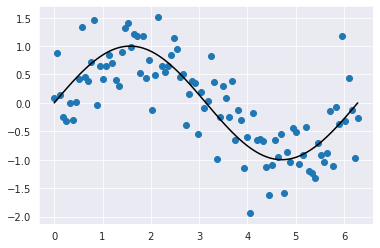

In [0]:
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], np.sin(df['x']), color='k')

plt.show()

In [0]:
lm = LinearRegression()

X = df.drop('y',axis=1)
y=df['y']

lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

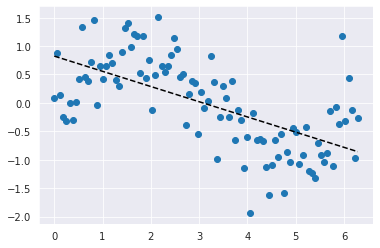

In [0]:
plt.scatter(df['x'],df['y'])
plt.plot(df.x,lm.predict(X),'k--')
plt.show()

In [0]:
df_garbage = df.copy()

np.random.seed(555)

for n in range(1, 100):
    df_garbage['g{}'.format(n)] = np.random.uniform(0, 2*np.pi, 100)

In [0]:
df_garbage.head()

,x,y,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,...,g60,g61,g62,g63,g64,g65,g66,g67,g68,g69,g70,g71,g72,g73,g74,g75,g76,g77,g78,g79,g80,g81,g82,g83,g84,g85,g86,g87,g88,g89,g90,g91,g92,g93,g94,g95,g96,g97,g98,g99
0,0.000000,0.086260,4.510285,4.243360,5.077364,5.775407,0.870371,1.042189,3.288845,1.005865,1.052502,3.175580,5.895522,5.870488,3.903133,2.668519,3.282817,4.094173,0.880424,2.996213,3.118989,1.147824,2.837148,2.839650,0.409650,3.642829,1.642933,1.301822,3.908672,1.028190,6.184563,0.906429,3.453761,5.314957,5.858500,5.133156,4.603108,3.380052,1.475456,3.803071,...,5.856653,4.570137,4.736102,6.229399,6.073511,0.893500,1.589484,5.690909,5.878595,0.365318,5.848337,3.098962,3.421179,3.973730,3.326170,3.087506,1.867172,4.839791,1.999900,3.886663,2.556170,5.712216,4.048645,5.348714,3.372741,4.380841,1.461631,1.911605,5.457319,3.004112,1.739148,0.401207,2.986740,3.419816,2.210869,4.116052,5.651802,2.931066,1.542499,2.299154
1,0.063467,0.881165,0.300683,2.204225,0.492213,5.097731,0.541594,0.343164,4.840217,4.343630,3.149967,2.076274,1.759298,5.444094,2.938032,4.200197,1.199190,3.979148,1.598494,1.758741,4.024471,3.951020,5.422190,4.514172,4.459619,3.159930,2.901864,0.695287,3.383681,2.629020,2.315087,0.769659,5.558526,2.897195,4.162310,2.788518,1.778288,4.323651,0.896190,3.713252,...,5.889551,6.090618,0.864594,3.960307,0.682757,4.816860,0.939704,6.267313,6.160211,4.368340,0.290720,5.458159,5.001682,2.887322,6.169497,4.332155,3.736490,2.409075,6.151429,6.208335,3.504041,4.846901,1.929619,2.411624,2.592169,1.236924,1.991130,2.231070,5.871841,1.519105,0.372066,2.432486,1.130922,0.067541,2.857747,5.934834,5.213061,5.579050,4.092146,4.464422
2,0.126933,0.145261,5.934292,4.499745,5.629712,0.721088,4.499597,1.054771,3.207139,2.356321,2.537807,1.889433,4.656596,4.494877,1.194202,4.760009,1.207124,3.588651,4.299645,2.416517,5.071783,1.871949,5.002775,3.996491,2.397042,2.290254,5.528217,1.017353,1.718960,5.290628,5.531407,0.835479,1.563958,4.339918,2.985258,1.966871,3.504641,5.421886,1.755435,5.266469,...,1.362105,0.049970,6.213079,5.819508,6.259281,3.599359,4.525876,0.989356,2.649699,0.107822,2.293262,2.864385,4.091935,6.132996,5.655899,3.972261,4.055669,4.399490,1.990648,0.988087,2.996496,6.040177,2.232170,2.774042,6.055675,2.695219,1.535565,0.155993,2.990297,1.929394,0.254268,3.335856,5.061090,0.854903,1.861820,0.216191,4.707951,1.171044,3.402163,5.652485
3,0.190400,-0.252824,4.312653,1.798761,6.126937,0.804294,4.019667,5.314475,3.989411,2.739722,3.497290,1.722815,6.185798,4.289519,2.196523,4.345576,1.969896,2.191259,0.942655,3.874540,1.176396,5.422721,1.962456,6.161889,2.249732,4.839469,1.383888,4.113686,4.296099,4.355895,1.858601,4.973328,3.050362,0.032895,5.773996,2.074032,1.523783,2.329209,0.970743,5.725764,...,3.878686,5.955161,4.445355,5.922151,1.837340,2.228289,0.254234,5.875696,3.738087,0.538353,3.082641,4.559514,0.776358,4.498631,2.356502,2.334325,1.920327,3.121354,3.930723,5.660037,0.922580,0.415104,5.080458,4.569396,6.111622,5.518925,0.470294,1.277002,1.263333,1.807333,0.749275,0.430104,3.887071,0.294676,0.168721,4.298122,5.752676,5.008056,3.983089,5.742110
4,0.253866,-0.320448,3.651833,4.475723,5.188299,3.456177,3.971505,1.095373,6.279545,1.951886,3.663845,4.367106,0.266223,1.035418,5.752958,3.443810,3.164304,2.978195,0.621278,5.568050,2.660933,1.298000,3.621318,4.848782,1.376865,4.517645,4.363025,5.344371,4.520540,6.191881,0.728250,3.453149,6.219077,3.266781,1.899957,0.328574,1.380565,4.776506,2.557795,0.874249,...,1.287073,6.040695,0.047898,2.427400,1.713452,1.184395,4.745780,2.203378,0.442434,0.889957,1.164464,5.291270,1.371902,5.297956,5.333054,4.737384,3.991227,4.196719,2.978713,4.676068,3.953472,5.374733,2.477681,5.107833,3.433619,1.340485,0.975944,2.290334,0.484615,3.841879,0.943278,6.061850,5.710574,1.732244,4.721764,4.733892,5.386840,1.901648,3.090707,1.974244


In [0]:
X_garbage = df_garbage.drop('y', axis=1)

lm_garbage = LinearRegression()
lm_garbage.fit(X_garbage, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

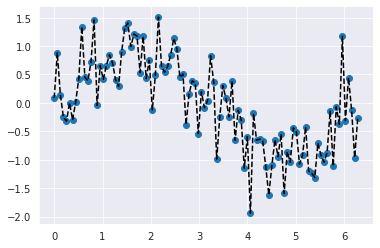

In [0]:
plt.scatter(df['x'], df.y)

plt.plot(df['x'], lm_garbage.predict(X_garbage), 'k--')

plt.show()

In [0]:
lasso = Lasso(random_state=1234)
lasso.fit(X_garbage,y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=1234,
      selection='cyclic', tol=0.0001, warm_start=False)

<function matplotlib.pyplot.show>

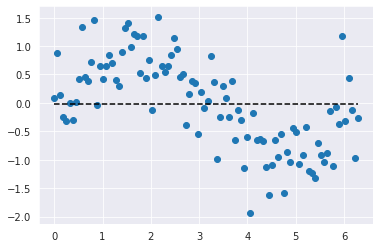

In [0]:
plt.scatter(df['x'],df['y'])
plt.plot(df['x'],lasso.predict(X_garbage),'k--')
plt.show

In [0]:
lasso.coef_

array([-0.,  0., -0., -0.,  0.,  0., -0., -0., -0.,  0.,  0., -0., -0.,
        0.,  0., -0., -0., -0., -0.,  0., -0.,  0.,  0.,  0.,  0., -0.,
       -0., -0., -0., -0., -0., -0.,  0., -0.,  0., -0.,  0.,  0.,  0.,
       -0., -0., -0.,  0.,  0., -0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,
        0., -0.,  0., -0., -0.,  0., -0.,  0., -0.,  0., -0., -0., -0.,
        0., -0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,
       -0.,  0.,  0.,  0., -0., -0., -0.,  0., -0.,  0.,  0., -0., -0.,
        0., -0.,  0.,  0.,  0.,  0., -0., -0.,  0.])

In [0]:
lasso2 = Lasso(alpha=0.1,random_state=1234)
lasso2.fit(X_garbage,y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=1234,
      selection='cyclic', tol=0.0001, warm_start=False)

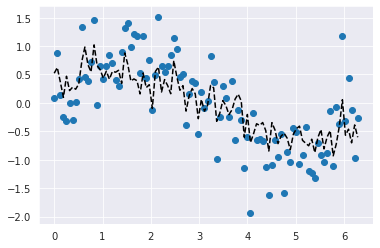

In [0]:
plt.scatter(df['x'],df['y'])
plt.plot(df['x'],lasso2.predict(X_garbage),'k--')
plt.show()

In [0]:
lasso2.coef_

array([-0.22232828,  0.        , -0.        , -0.00759667,  0.        ,
        0.        , -0.        , -0.03601924, -0.        ,  0.00433404,
        0.        , -0.02505424, -0.01967545,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.026227  ,
       -0.        ,  0.00728013,  0.        ,  0.0148694 , -0.        ,
       -0.        , -0.        , -0.02186635, -0.        , -0.        ,
       -0.01356253,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.00090083, -0.        ,
        0.00258886,  0.        ,  0.        ,  0.        ,  0.        ,
        0.00085948,  0.        ,  0.        , -0.0046698 , -0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.01597034,
       -0.01172187,  0.        , -0.        , -0.01543636, -0.        ,
        0.        , -0.01006564, -0.00366761,  0.        ,  0.02

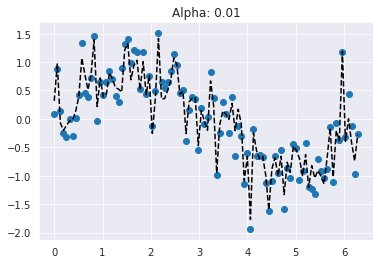

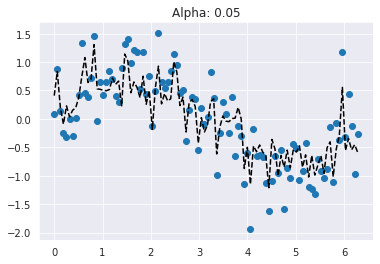

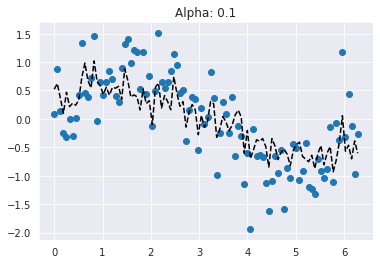

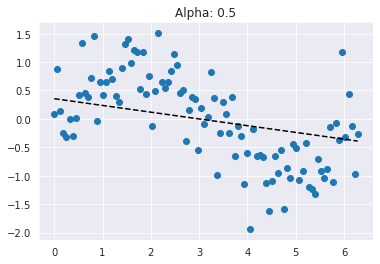

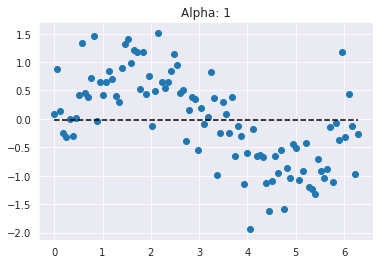

In [0]:
for penalty in [0.01,0.05,0.1,0.5,1]:
  lasso = Lasso(alpha=penalty, random_state=1234)
  lasso.fit(X_garbage,y)

  plt.scatter(df['x'],df['y'])

  plt.plot(df['x'], lasso.predict(X_garbage),'k--')
  plt.title('Alpha: {}'.format(penalty))

  plt.show()

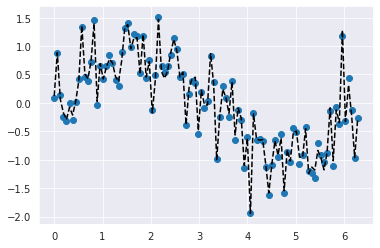

In [0]:
ridge = Ridge(alpha=1.0,random_state=1234)
ridge.fit(X_garbage,y)

plt.scatter(df['x'],df['y'])

plt.plot(df['x'], ridge.predict(X_garbage), 'k--')
plt.show()

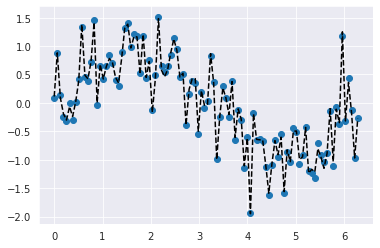

In [0]:
ridge = Ridge(alpha=0.5, random_state=1234)
ridge.fit(X_garbage, y)

plt.scatter(df.x, df.y)

plt.plot(df.x, ridge.predict(X_garbage), 'k--')
plt.show()

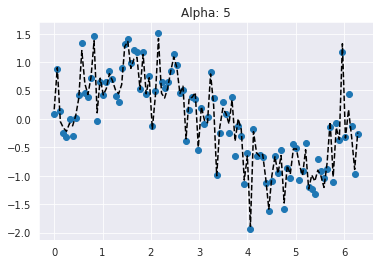

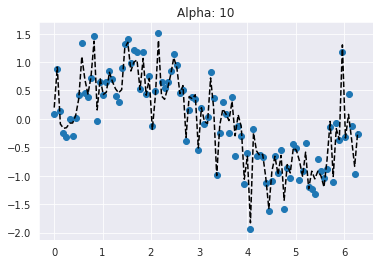

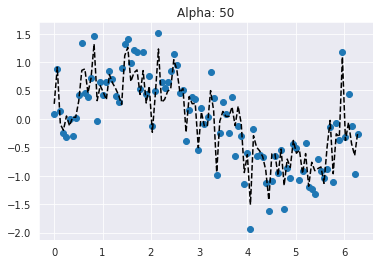

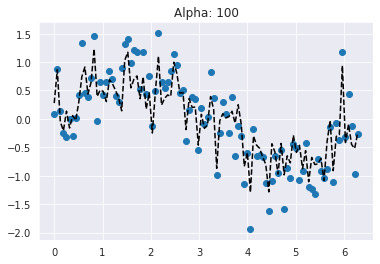

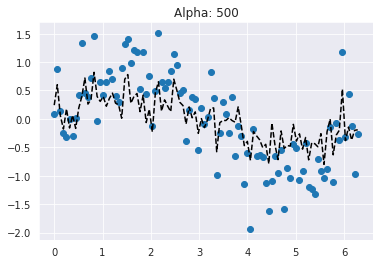

In [0]:
for penalty in [5, 10, 50, 100, 500]:
    ridge = Ridge(alpha=penalty, random_state=1234)
    ridge.fit(X_garbage, y)

    plt.scatter(df.x, df.y)

    plt.plot(df.x, ridge.predict(X_garbage), 'k--')
    plt.title('Alpha: {}'.format(penalty))
    plt.show()

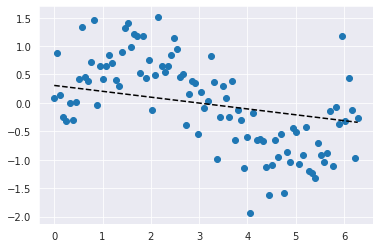

In [0]:
enet = ElasticNet (alpha=1.0,l1_ratio=0.5,random_state=1234)

enet.fit(X_garbage,y)

plt.scatter(df['x'],df['y'])

plt.plot(df['x'],enet.predict(X_garbage),'k--')
plt.show()

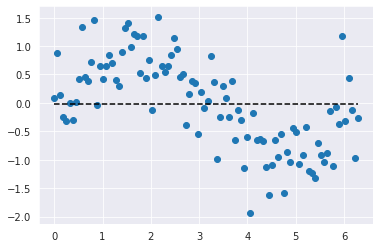

In [0]:
enet = ElasticNet (alpha=1.0,l1_ratio=0.9,random_state=1234)

enet.fit(X_garbage,y)

plt.scatter(df['x'],df['y'])

plt.plot(df['x'],enet.predict(X_garbage),'k--')
plt.show()

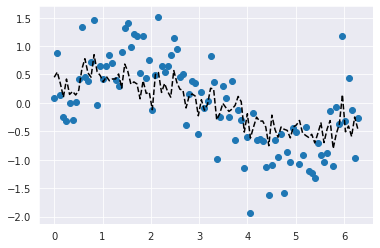

In [0]:
enet = ElasticNet (alpha=1.0,l1_ratio=0.1,random_state=1234)

enet.fit(X_garbage,y)

plt.scatter(df['x'],df['y'])

plt.plot(df['x'],enet.predict(X_garbage),'k--')
plt.show()

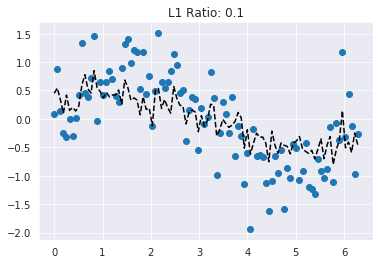

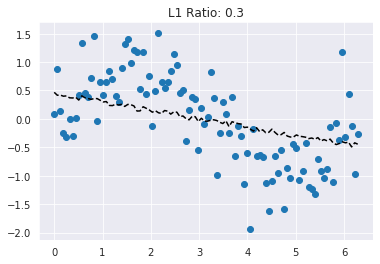

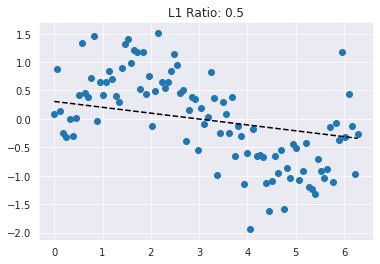

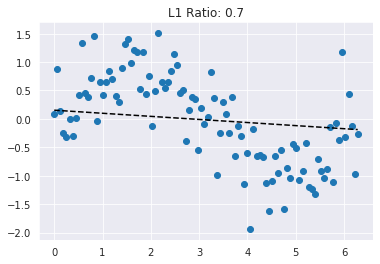

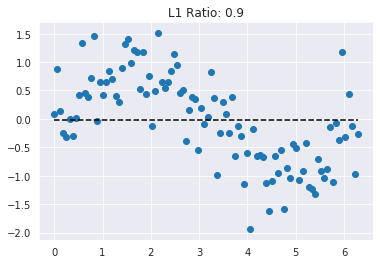

In [0]:
for ratio in [0.1, 0.3, 0.5, 0.7, 0.9]:
    enet = ElasticNet(l1_ratio=ratio, random_state=1234)
    enet.fit(X_garbage, y)

    plt.scatter(df.x, df.y)

    plt.plot(df.x, enet.predict(X_garbage), 'k--')
    plt.title('L1 Ratio: {}'.format(ratio))
    plt.show()